# PostMLF: LC-MS MS2 pos & neg vs Microbiome vs GC-MS

In [28]:
import pandas as pd
import numpy as np
import os
import biom

# Visualizations 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from adjustText import adjust_text

import prince

%matplotlib inline

In [29]:
#!mkdir /home/lfloerl/cloud/lfloerl/Microterroir/LC-MS_data/Results/MicrobiomeMetabolome

In [30]:
# set the directory 
os.chdir('/home/lfloerl/cloud/lfloerl/Microterroir/LC-MS_data/Results/MicrobiomeMetabolome')

In [31]:
group_colors = {
    'Bacteria': '#440154FF',
    'Climate': '#482677FF',
    'Fungi': '#3F4788FF',
    'GCMS': '#32648EFF',
    'LCMS_Neg': '#238A8DFF',
    'LCMS_Pos': '#20A386FF',
    'Plots': '#56C667FF', 
    'Wine Chemistry': '#FDE725FF'}

#sns.set_style(style="white")

# Load and Merge all data

### 1. Microbiome data 

In [32]:
df_ITS = pd.read_csv('ITS/PostMLF_cOTUs_rarefied_labled.tsv', sep='\t', index_col=0)
df_ITS.head()

,index,Dothideomycetes,Hyaloscypha,Cladosporium_austrohemisphaericum,Alternaria_subcucurbitae,Ramimonilia_apicalis,Malassezia_restricta,Ascomycota,Alternaria_eureka,Rhodotorula_graminis,...,Paracamarosporium_hawaiiense,Pleosporaceae,Melampsora_epitea,Hormonema_macrosporum,Claviceps_purpurea,Chaetothyriales,Endoconidioma_populi,Phaeococcomyces,Acremonium,Gallowayella_poeltii
0,PostMLF_2023_Plot4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PostMLF_2023_Plot13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PostMLF_2023_Plot9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,PostMLF_2023_Plot5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PostMLF_2021_Plot12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_16S = pd.read_csv('16S/PostMLF_cOTUs_rarefied_labled.tsv', sep='\t', index_col=0)

df_16S.head()

,index,s__Escherichia_coli,s__bacterium_Ellin6048,s__Acetobacter_cerevisiae,g__Actinomycetospora,s__Oenococcus_oeni,g__Pirellula,g__Rokubacteriales,g__Acetobacter,f__Vicinamibacteraceae,...,s__Mycobacterium_sp.,f__Pirellulaceae.1,s__Ruminiclostridium_hungatei,g__TK10.3,g__Vicinamibacteraceae.3,g__A4b,o__Gaiellales.2,g__Pirellula.4,s__Salmonella_enterica,g__Vicinamibacteraceae.4
0,PostMLF_2023_Plot4,0.0,0.0,0.0,0.0,84.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PostMLF_2023_Plot13,4.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
2,PostMLF_2023_Plot9,0.0,0.0,0.0,0.0,97.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,PostMLF_2023_Plot5,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PostMLF_2021_Plot17,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2. Metabolites

In [34]:
df_wMetadata_cleaned_collapsed = pd.read_csv('/home/lfloerl/cloud/lfloerl/Microterroir/LC-MS_data/Results/Pos_MS2_OutlierRemoved.csv', index_col=0)
postMLF_df_Pos = df_wMetadata_cleaned_collapsed[df_wMetadata_cleaned_collapsed['sample_type'] == 'PostMLF'].reset_index()
postMLF_df_Pos.shape

(31, 195)

In [35]:
df_wMetadata_cleaned_collapsed = pd.read_csv('/home/lfloerl/cloud/lfloerl/Microterroir/LC-MS_data/Results/Neg_MS2_OutlierRemoved.csv', index_col=0)
postMLF_df_Neg = df_wMetadata_cleaned_collapsed[df_wMetadata_cleaned_collapsed['sample_type'] == 'PostMLF'].reset_index()
postMLF_df_Neg.shape

(31, 174)

In [36]:
postMLF_df_all = pd.merge(postMLF_df_Pos, postMLF_df_Neg, on=('Sample Name', 'sample_type', 'year', 'plot'), how='outer')
postMLF_df_all.shape

(31, 365)

### 3. Climate, Plot MD and Wine Chemistry

In [37]:
# CHEMISTRY
md = pd.read_csv('/home/lfloerl/microterroir/Microbiome/Metadata/Raw-MD_Vineyard_MV_data.csv')
md["Plot_str"] = "Plot" + md["Plot"].astype(str)
md_wine_chemistry = md[['Plot_str', 'Year', 'Must_Oechsle', 'Wine_Tartatic_Acid', 
                        'Wine_Malic_Acid', 'Wine_Glucose', 'Wine_Fructose', 
                        'Wine_Lactic_Acid', 'Wien_Glycerol', 'Wine_Acetic_Acid']]

df_merged_1 = postMLF_df_all.merge(md_wine_chemistry, left_on=["plot", "year"], right_on=["Plot_str", "Year"], how="inner")
df_merged_1 = df_merged_1.drop(columns=['Plot_str', 'Year', 'sample_type']).dropna()

df_merged_1.head()

,Sample Name,year,plot,"1,2-Di-(9Z,12Z,15Z-octadecatrienoyl)-sn-glycero-3-phosphocholine","1,2-Dilinoleoyl-sn-glycero-3-phosphocholine","1,2-Dipalmitoleoyl-sn-glycero-3-phosphocholine","1,5-Naphthalenediamine","1,6-ANHYDRO-B-GLUCOSE","1-(3,4-dimethoxyphenyl)ethan-1-one oxime",1-Palmitoyl-sn-glycero-3-phosphocholine,...,"3,4-Bis(3-Methoxyanilino)cyclobut-3-ene-1,2-dione",L(-)-Fucose,Must_Oechsle,Wine_Tartatic_Acid,Wine_Malic_Acid,Wine_Glucose,Wine_Fructose,Wine_Lactic_Acid,Wien_Glycerol,Wine_Acetic_Acid
0,PostMLF_2021_Plot11,2021,Plot11,-0.585963,-0.474270,-0.532204,-0.538732,-0.766243,0.481209,-0.652926,...,-0.715982,0.228518,75.0,3.42,0.06,0.33,0.30,1.87,7.13,1.03
1,PostMLF_2021_Plot13,2021,Plot13,-0.653453,-0.508855,-0.621821,-0.575688,-0.856514,0.761038,-0.681777,...,-0.578826,-1.005457,75.0,2.61,0.09,0.33,0.28,1.53,7.13,0.68
2,PostMLF_2021_Plot14,2021,Plot14,-0.412632,-0.527166,-0.546934,-0.359954,-0.550805,0.658860,-0.301487,...,-0.572144,-0.518829,78.0,3.06,0.06,0.34,0.29,1.47,6.90,0.77
3,PostMLF_2021_Plot15,2021,Plot15,-0.502183,-0.464256,-0.531862,-0.438669,-0.606908,0.887332,-0.452500,...,-0.426984,0.887012,73.0,3.43,0.07,0.33,0.30,1.69,6.29,0.75
4,PostMLF_2021_Plot17,2021,Plot17,-0.590367,-0.503435,-0.598670,-0.443338,-0.699624,0.793923,-0.430528,...,-0.602861,0.479041,73.0,3.06,0.15,0.42,0.29,1.79,7.24,0.81


In [38]:
# PLOTS
md_plots = pd.read_csv('/home/lfloerl/microterroir/Microbiome/Metadata/RawMD-Lavaux_plots.csv')
md_plots["Plot_str"] = "Plot" + md_plots["Plot"].astype(str)
md_plots_subset =  md_plots[['Plot_str', 'Altitude', 'Average_slope', 'Exposition', 'Average_radiation', 'Geology', 'Hydromorphie_code']]
# Convert categorical columns to dummy variables
categorical_cols = ['Exposition', 'Geology']
md_plots_subset_dummies = pd.get_dummies(md_plots_subset, columns=categorical_cols, drop_first=True)
# Convert boolean columns to integers (0 or 1)
boolean_columns = md_plots_subset_dummies.select_dtypes(include='bool').columns
md_plots_subset_dummies[boolean_columns] = md_plots_subset_dummies[boolean_columns].astype(int)

df_merged_2 = df_merged_1.merge(md_plots_subset_dummies, left_on=["plot"], right_on=["Plot_str"], how="inner")
df_merged_2 = df_merged_2.drop(columns=['Plot_str']).dropna()

df_merged_2.head()

,Sample Name,year,plot,"1,2-Di-(9Z,12Z,15Z-octadecatrienoyl)-sn-glycero-3-phosphocholine","1,2-Dilinoleoyl-sn-glycero-3-phosphocholine","1,2-Dipalmitoleoyl-sn-glycero-3-phosphocholine","1,5-Naphthalenediamine","1,6-ANHYDRO-B-GLUCOSE","1-(3,4-dimethoxyphenyl)ethan-1-one oxime",1-Palmitoyl-sn-glycero-3-phosphocholine,...,Wien_Glycerol,Wine_Acetic_Acid,Altitude,Average_slope,Average_radiation,Hydromorphie_code,Exposition_South-West,Geology_Colluvium,Geology_Gravel_moraine,Geology_Molasse
0,PostMLF_2021_Plot11,2021,Plot11,-0.585963,-0.474270,-0.532204,-0.538732,-0.766243,0.481209,-0.652926,...,7.13,1.03,490,20,937.5,1,0,0,1,0
1,PostMLF_2021_Plot13,2021,Plot13,-0.653453,-0.508855,-0.621821,-0.575688,-0.856514,0.761038,-0.681777,...,7.13,0.68,580,30,937.5,1,1,0,0,1
2,PostMLF_2021_Plot14,2021,Plot14,-0.412632,-0.527166,-0.546934,-0.359954,-0.550805,0.658860,-0.301487,...,6.90,0.77,440,25,912.5,1,0,0,0,0
3,PostMLF_2021_Plot15,2021,Plot15,-0.502183,-0.464256,-0.531862,-0.438669,-0.606908,0.887332,-0.452500,...,6.29,0.75,520,30,912.5,0,1,0,1,0
4,PostMLF_2021_Plot17,2021,Plot17,-0.590367,-0.503435,-0.598670,-0.443338,-0.699624,0.793923,-0.430528,...,7.24,0.81,390,20,912.5,1,1,0,0,1


In [39]:
# CLIMATE
md_climate = pd.read_csv('/home/lfloerl/microterroir/Microbiome/Metadata/RawMD-Lavaux-Climate.csv', index_col=0)
# Remove underscores from the 'Plot' column
md_climate['Plot'] = md_climate['Plot'].str.replace('_', '', regex=False)
# include more climate data 
md_climate_subset = md_climate[['Plot', 'Year', 'cv_rh', 'median_rh', 'cv_temperature', 'median_temperature']]
# minimum 
#md_climate_subset = md_climate[['Plot', 'Year',  'average_rh','average_temperature']]

df_merged_3 = df_merged_2.merge(md_climate_subset, left_on=["plot", "year"], right_on=["Plot", "Year"], how="inner")
df_merged_3 = df_merged_3.drop(columns=['Plot', 'Year']).dropna()

df_merged_3.head()

,Sample Name,year,plot,"1,2-Di-(9Z,12Z,15Z-octadecatrienoyl)-sn-glycero-3-phosphocholine","1,2-Dilinoleoyl-sn-glycero-3-phosphocholine","1,2-Dipalmitoleoyl-sn-glycero-3-phosphocholine","1,5-Naphthalenediamine","1,6-ANHYDRO-B-GLUCOSE","1-(3,4-dimethoxyphenyl)ethan-1-one oxime",1-Palmitoyl-sn-glycero-3-phosphocholine,...,Average_radiation,Hydromorphie_code,Exposition_South-West,Geology_Colluvium,Geology_Gravel_moraine,Geology_Molasse,cv_rh,median_rh,cv_temperature,median_temperature
0,PostMLF_2021_Plot11,2021,Plot11,-0.585963,-0.474270,-0.532204,-0.538732,-0.766243,0.481209,-0.652926,...,937.5,1,0,0,1,0,16.118351,72.501870,23.246939,18.541438
1,PostMLF_2021_Plot13,2021,Plot13,-0.653453,-0.508855,-0.621821,-0.575688,-0.856514,0.761038,-0.681777,...,937.5,1,1,0,0,1,15.751161,71.964853,23.908978,17.902841
2,PostMLF_2021_Plot14,2021,Plot14,-0.412632,-0.527166,-0.546934,-0.359954,-0.550805,0.658860,-0.301487,...,912.5,1,0,0,0,0,15.496785,70.517165,22.570476,18.939473
3,PostMLF_2021_Plot15,2021,Plot15,-0.502183,-0.464256,-0.531862,-0.438669,-0.606908,0.887332,-0.452500,...,912.5,0,1,0,1,0,16.546105,71.769375,23.283449,18.384716
4,PostMLF_2021_Plot17,2021,Plot17,-0.590367,-0.503435,-0.598670,-0.443338,-0.699624,0.793923,-0.430528,...,912.5,1,1,0,0,1,16.381958,72.006812,21.847832,19.067133


In [40]:
## add microbiome 
df_merged_4 = df_merged_3.merge(df_ITS, left_on=["Sample Name"], right_on=["index"], how="inner")
df_merged_4 = df_merged_4.drop(columns=['index']).dropna()

df_merged_5 = df_merged_4.merge(df_16S, left_on=["Sample Name"], right_on=["index"], how="inner")
df_merged_5 = df_merged_5.drop(columns=['index']).dropna()

df_merged_5.head() 

,Sample Name,year,plot,"1,2-Di-(9Z,12Z,15Z-octadecatrienoyl)-sn-glycero-3-phosphocholine","1,2-Dilinoleoyl-sn-glycero-3-phosphocholine","1,2-Dipalmitoleoyl-sn-glycero-3-phosphocholine","1,5-Naphthalenediamine","1,6-ANHYDRO-B-GLUCOSE","1-(3,4-dimethoxyphenyl)ethan-1-one oxime",1-Palmitoyl-sn-glycero-3-phosphocholine,...,s__Mycobacterium_sp.,f__Pirellulaceae.1,s__Ruminiclostridium_hungatei,g__TK10.3,g__Vicinamibacteraceae.3,g__A4b,o__Gaiellales.2,g__Pirellula.4,s__Salmonella_enterica,g__Vicinamibacteraceae.4
0,PostMLF_2021_Plot11,2021,Plot11,-0.585963,-0.474270,-0.532204,-0.538732,-0.766243,0.481209,-0.652926,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PostMLF_2021_Plot13,2021,Plot13,-0.653453,-0.508855,-0.621821,-0.575688,-0.856514,0.761038,-0.681777,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
2,PostMLF_2021_Plot14,2021,Plot14,-0.412632,-0.527166,-0.546934,-0.359954,-0.550805,0.658860,-0.301487,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,PostMLF_2021_Plot17,2021,Plot17,-0.590367,-0.503435,-0.598670,-0.443338,-0.699624,0.793923,-0.430528,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PostMLF_2021_Plot19,2021,Plot19,-0.518364,-0.397765,-0.432828,-0.504701,-1.485374,0.543542,-0.506653,...,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [41]:
# add GC-MS 

GCMS_df = pd.read_csv('/home/lfloerl/cloud/lfloerl/Microterroir/GC-MS_data/Artifacts/GC-PostMLF-normalized.csv', index_col=0).T.reset_index()
GCMS_df['Sample Name'] = str('PostMLF_') + GCMS_df['index']
GCMS_df.drop(columns=('index'), inplace=True)

df_merged_all = df_merged_5.merge(GCMS_df, left_on=["Sample Name"], right_on=["Sample Name"], how="inner")

df_merged_all.tail()

,Sample Name,year,plot,"1,2-Di-(9Z,12Z,15Z-octadecatrienoyl)-sn-glycero-3-phosphocholine","1,2-Dilinoleoyl-sn-glycero-3-phosphocholine","1,2-Dipalmitoleoyl-sn-glycero-3-phosphocholine","1,5-Naphthalenediamine","1,6-ANHYDRO-B-GLUCOSE","1-(3,4-dimethoxyphenyl)ethan-1-one oxime",1-Palmitoyl-sn-glycero-3-phosphocholine,...,Phenethyl alcohol,"Propanoic acid, 2-hydroxy-, ethyl ester, (S)-","Propanoic acid, 2-methyl-",Tetradecane,"Undecanoic acid, ethyl ester",VARAMOL 106 YLBICYCLO[2HYLENE]R]ETHYLPHENYL ESTER]],trans-Geranylacetone,trans-Nerolidol,ß-Citronellol,ß-Damascenone
17,PostMLF_2023_Plot14,2023,Plot14,-0.392474,-0.366726,-0.348299,-0.412204,-0.511713,-0.745324,-0.421798,...,0.121055,0.039450,0.0,0.0,0.0,0.0,0.0,0.003657,0.001635,0.0
18,PostMLF_2023_Plot17,2023,Plot17,-0.628676,-0.576998,-0.693831,-0.754440,-0.397801,-0.850001,-0.636706,...,0.066770,0.042664,0.0,0.0,0.0,0.0,0.0,0.002992,0.000000,0.0
19,PostMLF_2023_Plot19,2023,Plot19,-0.537791,-0.478360,-0.668967,-0.545940,-0.708951,-0.443201,-0.660467,...,0.337959,0.021344,0.0,0.0,0.0,0.0,0.0,0.001651,0.002566,0.0
20,PostMLF_2023_Plot5,2023,Plot5,-0.465063,-0.418075,-0.448206,-0.426508,-0.640860,-0.343009,-0.535331,...,0.141074,0.023554,0.0,0.0,0.0,0.0,0.0,0.002576,0.002232,0.0
21,PostMLF_2023_Plot9,2023,Plot9,-0.405701,-0.408541,-0.351065,-0.476054,-0.607200,-0.418123,-0.397683,...,0.086547,0.028678,0.0,0.0,0.0,0.0,0.0,0.003718,0.001614,0.0


In [42]:
# Keep track of the columns' origins
Fun_columns = df_ITS.iloc[:, 1:].columns.tolist()
Bac_columns = df_16S.iloc[:, 1:].columns.tolist()
LCMS_Neg_columns = postMLF_df_Neg.iloc[:, 4:].columns.tolist()
LCMS_Pos_columns = postMLF_df_Pos.iloc[:, 4:].columns.tolist()
wine_chemistry_columns = md_wine_chemistry.iloc[:, 2:].columns.tolist()
plots_columns = md_plots_subset_dummies.iloc[:, 1:].columns.tolist()
climate_columns = md_climate_subset.iloc[:, 2:].columns.tolist()
metadata_columns = ['Sample Name', 'year', 'plot']
GCMS_columns = GCMS_df.iloc[:, :-1].columns.tolist()

In [43]:
# Create a multi-index column structure
multi_index_columns = (
    [('LCMS_Pos', col) for col in LCMS_Pos_columns] +
    [('LCMS_Neg', col) for col in LCMS_Neg_columns] +
    [('Wine Chemistry', col) for col in wine_chemistry_columns] +
    [('Plots', col) for col in plots_columns] +
    [('Climate', col) for col in climate_columns] +
    [('Fungi', col) for col in Fun_columns] +
    [('Bacteria', col) for col in Bac_columns] +
    [('GCMS', col) for col in GCMS_columns])

# Subset data and assign multi-index
df_metadata = df_merged_all[metadata_columns]  # Keep metadata separately
df_mfa = df_merged_all.drop(columns=metadata_columns)  # Drop metadata
df_mfa.columns = pd.MultiIndex.from_tuples(multi_index_columns)  # Assign multi-index
df_mfa = df_mfa.astype("float64")

# Extract the group names (first level of multi-index)
groups = df_mfa.columns.levels[0].tolist()

df_mfa.shape

(22, 712)

In [44]:
# drop columns with zero variance 
zero_var_cols = df_mfa.std() == 0
df_mfa = df_mfa.loc[:, ~zero_var_cols]

df_mfa.shape

(22, 655)

In [45]:
df_mfa.head()

LCMS_Pos  \
  1,2-Di-(9Z,12Z,15Z-octadecatrienoyl)-sn-glycero-3-phosphocholine   
0                                          -0.585963                 
1                                          -0.653453                 
2                                          -0.412632                 
3                                          -0.590367                 
4                                          -0.518364                 

                                               \
  1,2-Dilinoleoyl-sn-glycero-3-phosphocholine   
0                                   -0.474270   
1                                   -0.508855   
2                                   -0.527166   
3                                   -0.503435   
4                                   -0.397765   

                                                                         \
  1,2-Dipalmitoleoyl-sn-glycero-3-phosphocholine 1,5-Naphthalenediamine   
0                                      -0.532204              -0.538732   
1                                      -0.621821              -0.575688   
2                                      -0.546934              -0.359954   
3                                      -0.598670              -0.443338   
4                                      -0.432828              -0.504701   

                                                                  \
  1,6-ANHYDRO-B-GLUCOSE 1-(3,4-dimethoxyphenyl)ethan-1-one oxime   
0             -0.766243                                 0.481209   
1             -0.856514                                 0.761038   
2             -0.550805                                 0.658860   
3             -0.699624                                 0.793923   
4             -1.485374                                 0.543542   

                                                             \
  1-Palmitoyl-sn-glycero-3-phosphocholine 1-Tetradecylamine   
0                               -0.652926         -0.832666   
1                               -0.681777         -0.850155   
2                               -0.301487          0.167907   
3                               -0.430528         -0.657197   
4                               -0.506653         -0.402163   

                                     \
  2,2,6,6-Tetramethyl-4-piperidinol   
0                         -0.380747   
1                         -0.812693   
2                         -0.773361   
3                         -0.196787   
4                         -0.724185   

                                                                                     \
  2,2-difluoro-N-[2-methyl-6-(trifluoromethyl)pyridin-3-yl]-2-(phenylthio)acetamide   
0                                           2.974238                                  
1                                           1.977174                                  
2                                           1.760381                                  
3                                           1.495963                                  
4                                           1.191523                                  

   ...               GCMS                                     \
   ... Octanoic acid <n-> Octanoic acid, 3-methylbutyl ester   
0  ...           0.008360                           0.000000   
1  ...           0.003310                           0.003095   
2  ...           0.007116                           0.000000   
3  ...           0.005345                           0.000000   
4  ...           0.005045                           0.000000   

                                             \
  Oxime-, methoxy-phenyl- Phenethyl alcohol   
0                0.002747          0.183028   
1                0.002807          0.143181   
2                0.003762          0.106478   
3                0.002227          0.122985   
4                0.001474          0.138099   

                                                                           \
  Propanoic acid, 2-hydroxy-, ethyl es

In [46]:
df_export = df_merged_all.copy()

multi_index_columns_wMetadata = (
    [('Metadata', col) for col in metadata_columns] +
    [('LCMS_Pos', col) for col in LCMS_Pos_columns] +
    [('LCMS_Neg', col) for col in LCMS_Neg_columns] +
    [('Wine Chemistry', col) for col in wine_chemistry_columns] +
    [('Plots', col) for col in plots_columns] +
    [('Climate', col) for col in climate_columns] +
    [('Fungi', col) for col in Fun_columns] +
    [('Bacteria', col) for col in Bac_columns] +
    [('GCMS', col) for col in GCMS_columns])

df_export.columns = pd.MultiIndex.from_tuples(multi_index_columns_wMetadata) 

#!mkdir PostMLF_MicrobiomeMetabolome 

df_export.to_csv('PostMLF_MicrobiomeMetabolome/MFA_table.csv')

In [47]:
# Check if there are any NaN values in df_mfa
nan_cells = df_mfa.isna().sum().sum()
print(f"Total NaN cells in df_mfa: {nan_cells}")

Total NaN cells in df_mfa: 0


# MFA 

## How many Components?

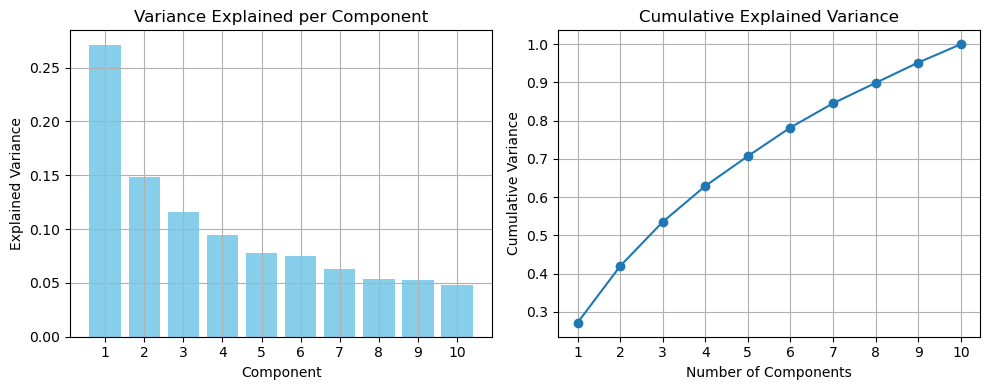

In [48]:
# Define the number of components to test
n_components = 10

# Define MFA and fit the model
mfa = prince.MFA(
    n_components=n_components,  
    n_iter=3, 
    copy=True,
    check_input=True,
    random_state=42)

# Fit MFA to the data (excluding metadata columns)
mfa = mfa.fit(
    df_mfa,
    groups=groups,
    supplementary_groups=None)

# Get explained variance per component
explained_variance_ratio = mfa.eigenvalues_ / np.sum(mfa.eigenvalues_)

# Create subplots for explained variance and cumulative variance plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Bar plot for variance explained per component
axes[0].bar(range(1, n_components + 1), explained_variance_ratio[:n_components], color='skyblue')
axes[0].set_title('Variance Explained per Component')
axes[0].set_xlabel('Component')
axes[0].set_ylabel('Explained Variance')
axes[0].set_xticks(range(1, n_components + 1))
axes[0].grid(True)

# Line plot for cumulative explained variance (elbow plot)
axes[1].plot(range(1, n_components + 1), np.cumsum(explained_variance_ratio[:n_components]), marker='o', linestyle='-')
axes[1].set_title('Cumulative Explained Variance')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Variance')
axes[1].set_xticks(range(1, n_components + 1))
axes[1].grid(True)

# Adjust layout to ensure proper display
plt.tight_layout()
plt.show()

In [49]:
# Initialize MFA model
mfa = prince.MFA(
    n_components=6,
    n_iter=10,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

# Fit MFA with multi-index groups
mfa = mfa.fit(
    df_mfa,
    groups=groups,
    supplementary_groups=None)

mfa_results = mfa.transform(df_mfa)
# Merge MFA results with metadata to retain 'year' information
mfa_results = mfa_results.merge(df_metadata, left_index=True, right_index=True)

mfa.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,5.300,21.88%,21.88%
1,2.897,11.96%,33.84%
2,2.262,9.34%,43.18%
3,1.839,7.59%,50.77%
4,1.528,6.31%,57.07%
5,1.464,6.04%,63.12%


## Contributions


/scratch/lfloerl/tmpdata/ipykernel_2864309/648557444.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Group', y='Sum of Contributions', data=df_plot, palette=group_colors)


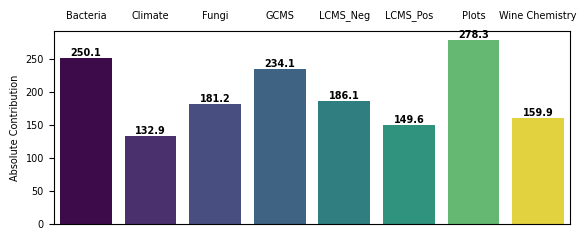

In [50]:
partial_coords = mfa.partial_row_coordinates(df_mfa)

# Assuming `partial_coords` is the dataframe you obtained from MFA
df_abs_sum = partial_coords.abs().sum()

# Convert to DataFrame for plotting
df_plot = df_abs_sum.groupby(level=0).sum().reset_index()
df_plot.columns = ['Group', 'Sum of Contributions']

# Plot
plt.figure(figsize=(6, 2.5))
ax = sns.barplot(x='Group', y='Sum of Contributions', data=df_plot, palette=group_colors)
# Add numeric values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=7, fontweight='bold')
ax.tick_params(axis='both', labelsize=7)

# Move x-axis labels to the top
ax.xaxis.set_label_position('top')
ax.xaxis.set_tick_params(labeltop=True)  # Make sure the labels appear on top

# Remove x-ticks at the bottom
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

#plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Absolute Contribution', fontsize=7)
plt.tight_layout()

plt.savefig('/home/lfloerl/cloud/lfloerl/Microterroir/Figures/MFA_PostMLF_AbsoluteContributions.png', dpi=1000)

plt.show()

<hr>


### group representation

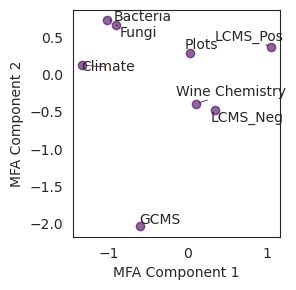

In [ ]:
# get the coordinates per group 
group_rep_df =  mfa.partial_row_coordinates(df_mfa)
group_rep_df_ave = pd.DataFrame(group_rep_df.median())
group_rep_df_ave.reset_index(inplace=True)
# Rename the columns
group_rep_df_ave.columns = ['group', 'subgroup', 'value']
# Filter for only subgroups 0 and 1
group_rep_df_ave = group_rep_df_ave[group_rep_df_ave['subgroup'].isin([0, 1])]
# Pivot the DataFrame to get the desired structure
group_rep_df_ave_PC12 = group_rep_df_ave.pivot(index='group', columns='subgroup', values='value')
# Rename the columns to PC1 and PC2
group_rep_df_ave_PC12.columns = ['PC1', 'PC2']
# Reset the index to make 'group' a column
group_rep_df_ave_PC12 = group_rep_df_ave_PC12.reset_index()


# Plot
plt.figure(figsize=(3, 3))
plt.scatter(group_rep_df_ave_PC12['PC1'], group_rep_df_ave_PC12['PC2'], color='#440154FF', alpha=0.6)

# Create a list to store the text objects
texts = []

# Add labels for each group
for group_name, (x, y) in zip(group_rep_df_ave_PC12['group'], zip(group_rep_df_ave_PC12['PC1'], group_rep_df_ave_PC12['PC2'])):
    texts.append(plt.text(x, y, str(group_name), fontsize=10))

plt.xlabel("MFA Component 1")
plt.ylabel("MFA Component 2")

# Adjust the text positions to avoid overlaps and stay within the figure
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='#440154FF', lw=0.5))

plt.tight_layout()
plt.show()



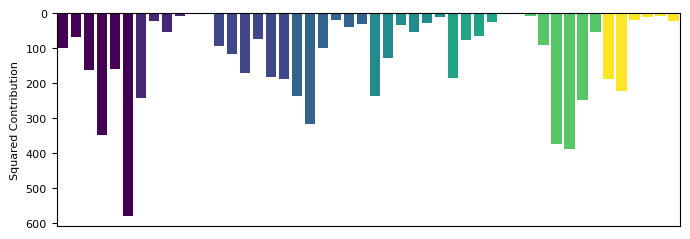

In [52]:
dim_contributions = partial_coords.groupby(level=0).agg(lambda x: np.sum(x**2))

# 1. Sum the columns for each group
group_sums = dim_contributions.sum(axis=0)
# 2. Convert the Series to a DataFrame (optional, for inspection)
group_sums_df = group_sums.to_frame(name='Sum of Column Values')
# 3. Extract the first element of the multiindex for x-axis labels
x_labels = [label[0] for label in group_sums_df.index]
# Reset the multiindex
group_sums_df = group_sums_df.reset_index()
# Rename the columns
group_sums_df.columns = ['group', 'dimension', 'Sum of Column Values']
# make new col
group_sums_df['group_dim'] = group_sums_df['group'] + '_' + group_sums_df['dimension'].astype(str)
# Map group names to colors
group_sums_df['color'] = group_sums_df['group'].map(group_colors)


# PLOT 
fig, ax = plt.subplots(figsize=(7,2.5))
ax.bar(group_sums_df['group_dim'], group_sums_df['Sum of Column Values'], color=group_sums_df['color'])

# Invert the y-axis
ax.invert_yaxis()

# Labels & title
plt.title('')
plt.xlabel('')
ax.set_xticklabels([])
plt.ylabel('Squared Contribution', fontsize=8)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='both', labelsize=8)


# Tight layout
plt.tight_layout()

# Adjust x-axis limits to remove white space
ax.set_xlim(-0.5, len(group_sums_df) - 0.5)

# Save 
plt.savefig('/home/lfloerl/cloud/lfloerl/Microterroir/Figures/MFA_PostMLF_ContributionsPerDimension.png',  dpi=1000)  

plt.show()


<hr>


### group representation

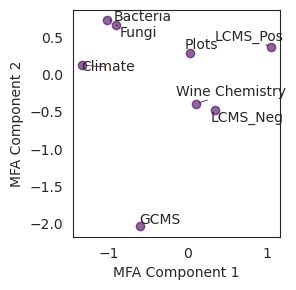

In [ ]:
# get the coordinates per group 
group_rep_df =  mfa.partial_row_coordinates(df_mfa)
group_rep_df_ave = pd.DataFrame(group_rep_df.median())
group_rep_df_ave.reset_index(inplace=True)
# Rename the columns
group_rep_df_ave.columns = ['group', 'subgroup', 'value']
# Filter for only subgroups 0 and 1
group_rep_df_ave = group_rep_df_ave[group_rep_df_ave['subgroup'].isin([0, 1])]
# Pivot the DataFrame to get the desired structure
group_rep_df_ave_PC12 = group_rep_df_ave.pivot(index='group', columns='subgroup', values='value')
# Rename the columns to PC1 and PC2
group_rep_df_ave_PC12.columns = ['PC1', 'PC2']
# Reset the index to make 'group' a column
group_rep_df_ave_PC12 = group_rep_df_ave_PC12.reset_index()


# Plot
plt.figure(figsize=(3, 3))
plt.scatter(group_rep_df_ave_PC12['PC1'], group_rep_df_ave_PC12['PC2'], color='#440154FF', alpha=0.6)

# Create a list to store the text objects
texts = []

# Add labels for each group
for group_name, (x, y) in zip(group_rep_df_ave_PC12['group'], zip(group_rep_df_ave_PC12['PC1'], group_rep_df_ave_PC12['PC2'])):
    texts.append(plt.text(x, y, str(group_name), fontsize=10))

plt.xlabel("MFA Component 1")
plt.ylabel("MFA Component 2")

# Adjust the text positions to avoid overlaps and stay within the figure
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='#440154FF', lw=0.5))

plt.tight_layout()
plt.show()



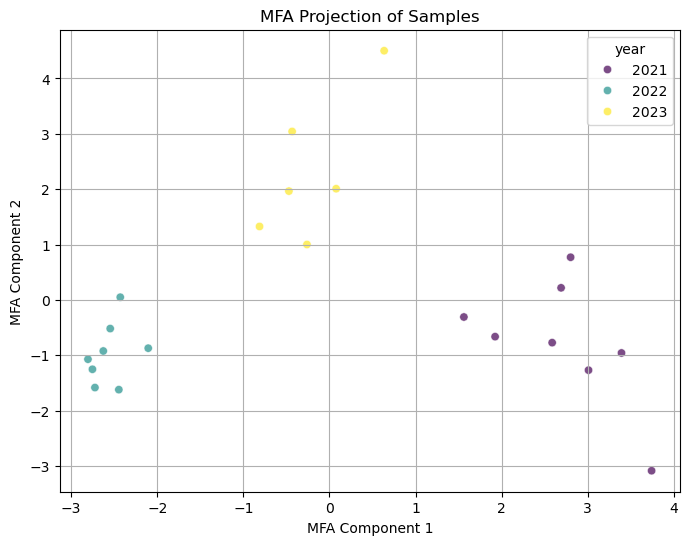

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)
plt.xlabel("MFA Component 1")
plt.ylabel("MFA Component 2")
plt.title("MFA Projection of Samples")
plt.grid()
plt.show()

## Biplots


In [25]:
# Extract coordinates of individuals (rows)
individuals = mfa_results.iloc[:, :2].values  # First 2 components

# Extract variable loadings (correlations with MFA axes)
variable_loadings = mfa.column_correlations.iloc[:, :2]

# Drop the multi-index
variable_loadings_df = variable_loadings.reset_index()

# Rename columns
variable_loadings_df.columns = ["Variable", "MFA Comp 1", "MFA Comp 2"]

# Compute Loadings contribution (sum of squared correlations)
variable_loadings_df["Loadings Contribution"] = ( variable_loadings_df["MFA Comp 1"].abs() + variable_loadings_df["MFA Comp 2"].abs())

# Sort by Loadings contribution in descending order
variable_loadings_df = variable_loadings_df.sort_values(by="Loadings Contribution", ascending=False)

variable_loadings_df["group"] = variable_loadings_df["Variable"].apply(lambda x: x[0])

# Select top 20 based on Loadings Contribution
top_loadings = variable_loadings_df.nlargest(10, "Loadings Contribution")
top_loadings['Variable'] = top_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

top_loadings

,Variable,MFA Comp 1,MFA Comp 2,Loadings Contribution,group
316,'Azelaic acid',-0.595794,-0.709776,1.305570,LCMS_Neg
252,'Farnesol <(2Z,-0.602922,0.683713,1.286635,GCMS
263,'Linalool',-0.836761,-0.442653,1.279414,GCMS
254,'Heptadecanoic acid,-0.830781,-0.438885,1.269666,GCMS
253,'Formic acid,-0.803082,-0.464444,1.267526,GCMS
516,'Imidazolelactic acid',-0.811046,-0.454822,1.265868,LCMS_Pos
470,'4-Methyl-5-thiazoleethanol',0.871317,-0.385954,1.257272,LCMS_Pos
581,'Phe-Ala',0.833298,0.419459,1.252758,LCMS_Pos
226,'Benzaldehyde <2,0.887319,-0.365302,1.252621,GCMS
557,'N1-[4-(1,0.861347,-0.390041,1.251389,LCMS_Pos


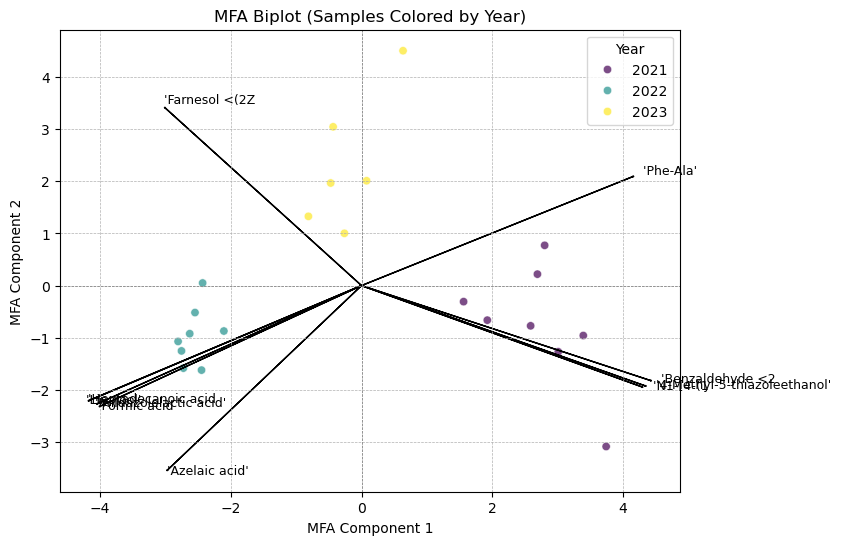

In [26]:
# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)


# Define a scaling factor to extend the arrows
scaling_factor = 5 # Adjust this value to control arrow length
# Plot the top loadings as arrows
for i, row in top_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  # Adjust text position accordingly
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)


# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (Samples Colored by Year)")
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


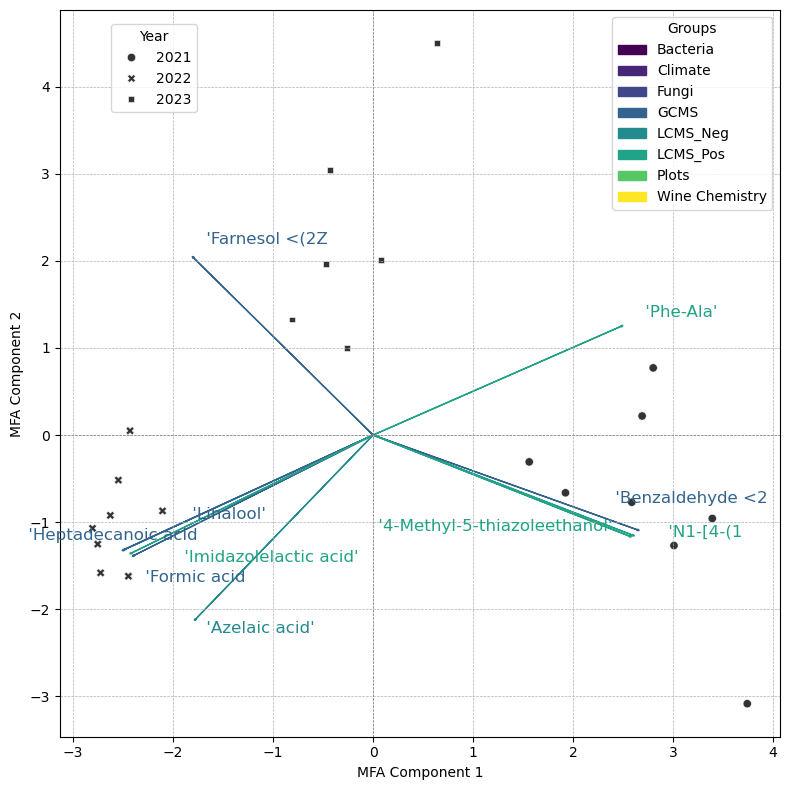

In [27]:
# Biplot
fig, ax = plt.subplots(figsize=(8, 8))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], style="year", alpha=0.8, color='black')

# Define a scaling factor to extend the arrows
scaling_factor = 3  

# Create a color map based on the group and intensity (Total Contribution)
norm = plt.Normalize(vmin=top_loadings['Loadings Contribution'].min(), vmax=top_loadings['Loadings Contribution'].max())  
sm = plt.cm.ScalarMappable(cmap='Greys', norm=norm)
sm.set_array([])

## Store text objects for later adjustment
text_objects = []

for i, row in top_loadings.iterrows():
    group_color = group_colors.get(row['group'], 'black')  
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color=group_color, length_includes_head=True)
    
    # Add text label with matching color
    text = ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  
                   row["MFA Comp 2"] * (scaling_factor + 0.1), 
                   row["Variable"], fontsize=12, color=group_color)
    text_objects.append(text)

# Adjust label positions to prevent overlap
adjust_text(text_objects, ax=ax, expand_points=(1.3, 1.3), arrowprops=dict(arrowstyle="-", color='gray', lw=0))

# Add first legend for groups (custom patches)
# Create the patches
group_legend_patches = [matplotlib.patches.Patch(color=color, label=group) for group, color in group_colors.items()]
# Create the legend and set the font size
plt.legend(handles=group_legend_patches, fontsize=12)
group_legend = ax.legend(handles=group_legend_patches, title="Groups", loc="upper right", bbox_to_anchor=(0.999, 1))

# Add second legend for Year (from scatterplot)
year_legend = ax.legend(title="Year", bbox_to_anchor=(0.2, 0.99))

# Add both legends back to the plot
ax.add_artist(group_legend)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("")

# Show grid
ax.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()

plt.savefig('/home/lfloerl/cloud/lfloerl/Microterroir/Figures/MFA_PostMLF.png', dpi=1000)

plt.show()


### Seperate Biplots

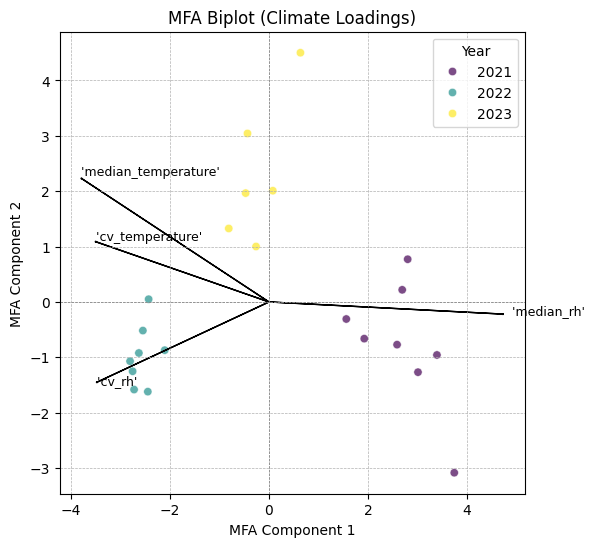

In [ ]:
# Select only the "Climate" group
select_loadings_df = variable_loadings_df[variable_loadings_df["group"] == "Climate"]

# Select top 10 based on Loadings Contribution
top_select_loadings = select_loadings_df.nlargest(10, "Loadings Contribution")
top_select_loadings['Variable'] = top_select_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

# Biplot
fig, ax = plt.subplots(figsize=(6, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)

# Define a scaling factor for arrows
scaling_factor = 5

# Plot the top climate loadings as arrows
for i, row in top_select_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (Climate Loadings)")
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

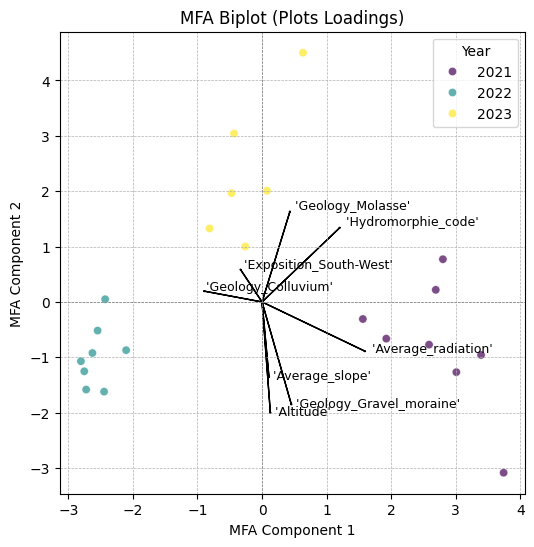

In [ ]:
# Select only the 'Metabolites_Neg' group
select_loadings_df = variable_loadings_df[variable_loadings_df["group"] == 'Plots']

# Select top 10 based on Loadings Contribution
top_select_loadings = select_loadings_df.nlargest(10, "Loadings Contribution")
top_select_loadings['Variable'] = top_select_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

# Biplot
fig, ax = plt.subplots(figsize=(6, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)

# Define a scaling factor for arrows
scaling_factor = 5

# Plot the top climate loadings as arrows
for i, row in top_select_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (Plots Loadings)")
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

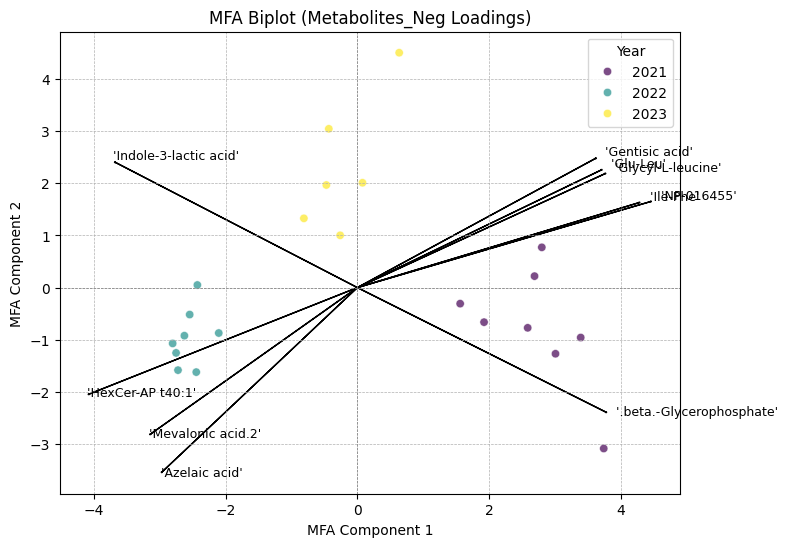

In [ ]:
# Select only the 'Metabolites_Neg' group
select_loadings_df = variable_loadings_df[variable_loadings_df["group"] == 'LCMS_Neg']

# Select top 10 based on Loadings Contribution
top_select_loadings = select_loadings_df.nlargest(10, "Loadings Contribution")
top_select_loadings['Variable'] = top_select_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)

# Define a scaling factor for arrows
scaling_factor = 5

# Plot the top climate loadings as arrows
for i, row in top_select_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (Metabolites_Neg Loadings)")
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

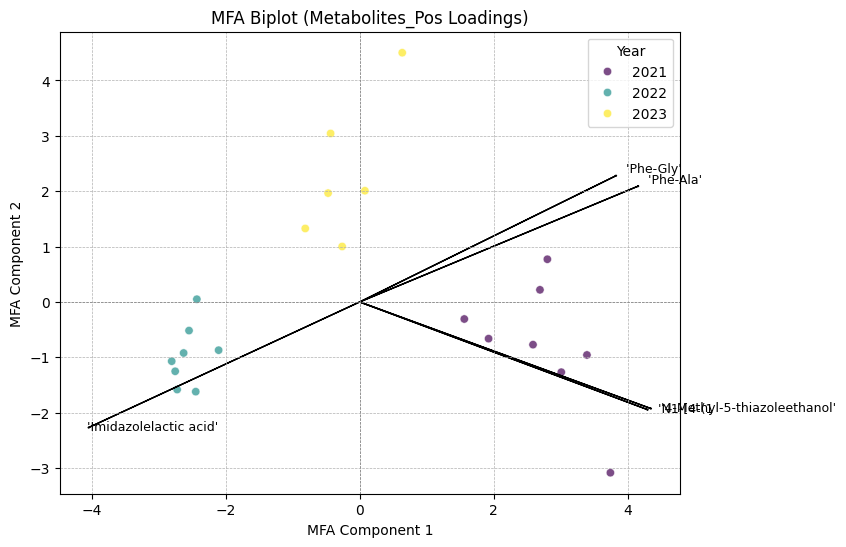

In [ ]:
# Select only the 'Metabolites_Pos' group
select_loadings_df = variable_loadings_df[variable_loadings_df["group"] == 'LCMS_Pos']

# Select top 10 based on Loadings Contribution
top_select_loadings = select_loadings_df.nlargest(5, "Loadings Contribution")
top_select_loadings['Variable'] = top_select_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)

# Define a scaling factor for arrows
scaling_factor = 5

# Plot the top climate loadings as arrows
for i, row in top_select_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (Metabolites_Pos Loadings)")
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

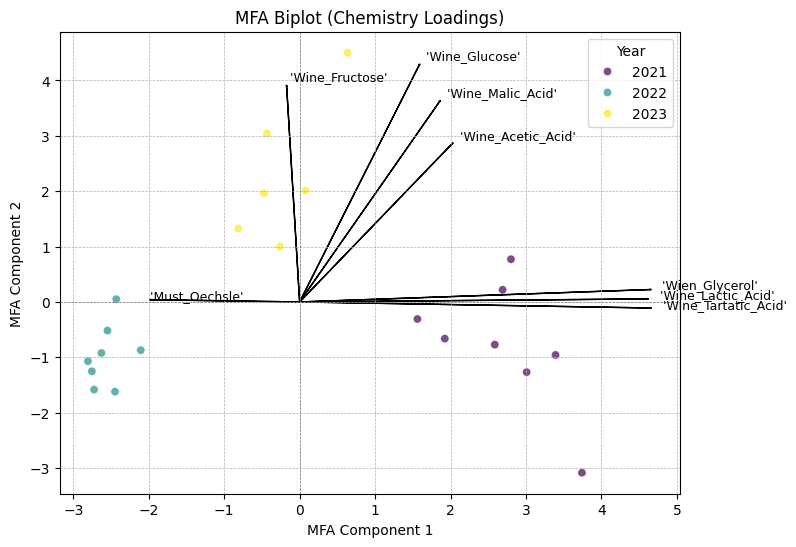

In [ ]:
# Select only the 'Wine Chemistry' group
select_loadings_df = variable_loadings_df[variable_loadings_df["group"] == 'Wine Chemistry']

# Select top 10 based on Loadings Contribution
top_select_loadings = select_loadings_df.nlargest(10, "Loadings Contribution")
top_select_loadings['Variable'] = top_select_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)

# Define a scaling factor for arrows
scaling_factor = 5

# Plot the top climate loadings as arrows
for i, row in top_select_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (Chemistry Loadings)")
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

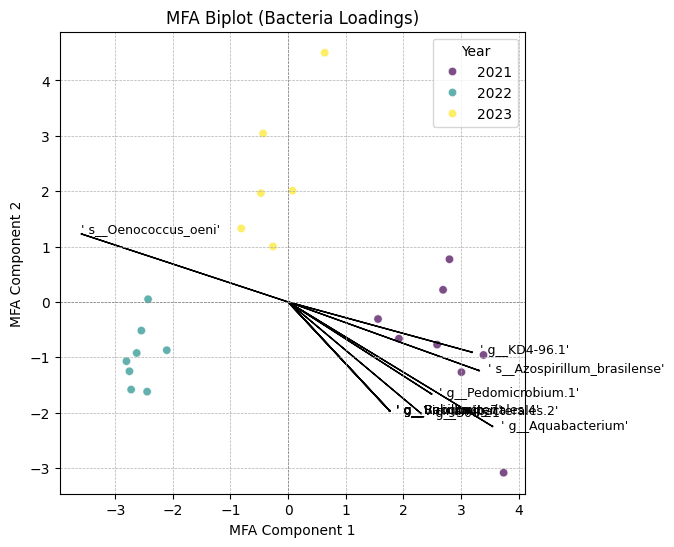

In [ ]:
# Select only the "Bacteria" group
select_loadings_df = variable_loadings_df[variable_loadings_df["group"] == "Bacteria"]

# Select top 10 based on Loadings Contribution
top_select_loadings = select_loadings_df.nlargest(10, "Loadings Contribution")
top_select_loadings['Variable'] = top_select_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

# Biplot
fig, ax = plt.subplots(figsize=(6, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)

# Define a scaling factor for arrows
scaling_factor = 5

# Plot the top climate loadings as arrows
for i, row in top_select_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (Bacteria Loadings)")
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

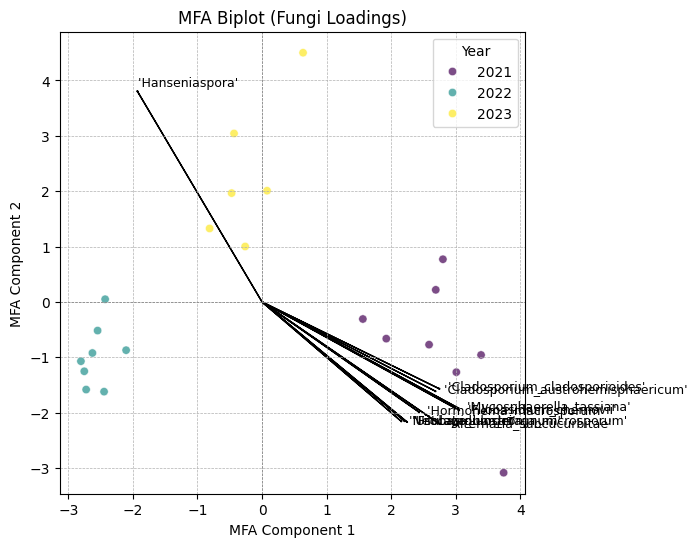

In [ ]:
# Select only the "Fungi" group
select_loadings_df = variable_loadings_df[variable_loadings_df["group"] == "Fungi"]

# Select top 10 based on Loadings Contribution
top_select_loadings = select_loadings_df.nlargest(10, "Loadings Contribution")
top_select_loadings['Variable'] = top_select_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

# Biplot
fig, ax = plt.subplots(figsize=(6, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)

# Define a scaling factor for arrows
scaling_factor = 5

# Plot the top climate loadings as arrows
for i, row in top_select_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (Fungi Loadings)")
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

# MFA single year

## How many Components?

In [ ]:
df_mfa_year = df_merged_all[(df_merged_all['year'] == 2021)]

# Subset data and assign multi-index
df_mfa_year.drop(columns=metadata_columns, inplace=True)  # Drop metadata
df_mfa_year.columns = pd.MultiIndex.from_tuples(multi_index_columns)  # Assign multi-index
df_mfa_year = df_mfa_year.astype("float64")

# Extract the group names (first level of multi-index)
groups = df_mfa_year.columns.levels[0].tolist()
groups

/scratch/lfloerl/tmpdata/ipykernel_3105400/1619464699.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mfa_year.drop(columns=metadata_columns, inplace=True)  # Drop metadata


['Bacteria',
 'Climate',
 'Fungi',
 'GCMS',
 'LCMS_Neg',
 'LCMS_Pos',
 'Plots',
 'Wine Chemistry']

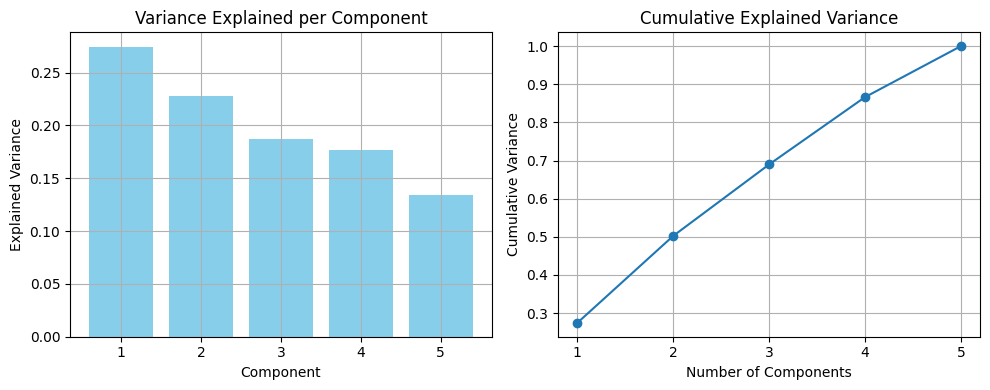

In [ ]:
# Define the number of components to test
n_components = 5

# Define MFA and fit the model
mfa = prince.MFA(
    n_components=n_components,  
    n_iter=3, 
    copy=True,
    check_input=True,
    random_state=42)

# Fit MFA to the data (excluding metadata columns)
mfa = mfa.fit(
    df_mfa_year,
    groups=groups,
    supplementary_groups=None)

# Get explained variance per component
explained_variance_ratio = mfa.eigenvalues_ / np.sum(mfa.eigenvalues_)

# Create subplots for explained variance and cumulative variance plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Bar plot for variance explained per component
axes[0].bar(range(1, n_components + 1), explained_variance_ratio[:n_components], color='skyblue')
axes[0].set_title('Variance Explained per Component')
axes[0].set_xlabel('Component')
axes[0].set_ylabel('Explained Variance')
axes[0].set_xticks(range(1, n_components + 1))
axes[0].grid(True)

# Line plot for cumulative explained variance (elbow plot)
axes[1].plot(range(1, n_components + 1), np.cumsum(explained_variance_ratio[:n_components]), marker='o', linestyle='-')
axes[1].set_title('Cumulative Explained Variance')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Variance')
axes[1].set_xticks(range(1, n_components + 1))
axes[1].grid(True)

# Adjust layout to ensure proper display
plt.tight_layout()
plt.show()

In [ ]:
# Initialize MFA model
mfa = prince.MFA(
    n_components=4,
    n_iter=10,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

# Fit MFA with multi-index groups
mfa = mfa.fit(
    df_mfa_year,
    groups=groups,
    supplementary_groups=None)

mfa_results = mfa.transform(df_mfa_year)
# Merge MFA results with metadata to retain 'year' information
mfa_results = mfa_results.merge(df_metadata, left_index=True, right_index=True)

mfa.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,5.294,22.19%,22.19%
1,4.401,18.45%,40.65%
2,3.616,15.16%,55.81%
3,3.406,14.28%,70.09%


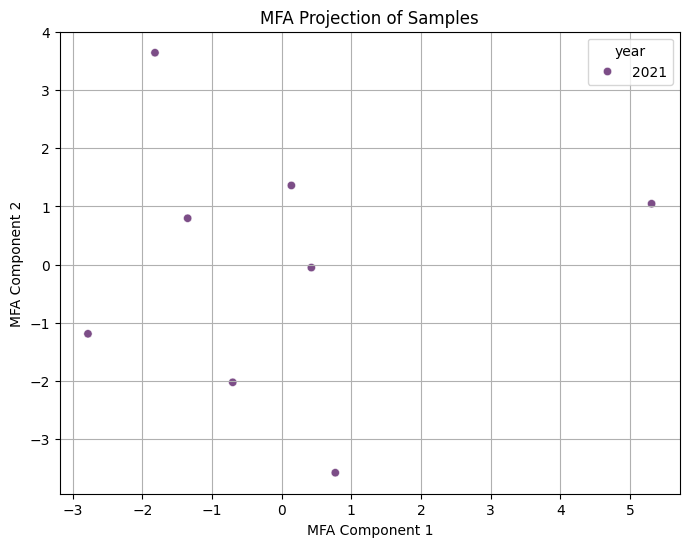

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)
plt.xlabel("MFA Component 1")
plt.ylabel("MFA Component 2")
plt.title("MFA Projection of Samples")
plt.grid()
plt.show()

In [ ]:
# Extract coordinates of individuals (rows)
individuals = mfa_results.iloc[:, :2].values  # First 2 components

# Extract variable loadings (correlations with MFA axes)
variable_loadings = mfa.column_correlations.iloc[:, :2]

# Drop the multi-index
variable_loadings_df = variable_loadings.reset_index()

# Rename columns
variable_loadings_df.columns = ["Variable", "MFA Comp 1", "MFA Comp 2"]

# Compute Loadings contribution (sum of squared correlations)
variable_loadings_df["Loadings Contribution"] = ( variable_loadings_df["MFA Comp 1"].abs() + variable_loadings_df["MFA Comp 2"].abs())

# Sort by Loadings contribution in descending order
variable_loadings_df = variable_loadings_df.sort_values(by="Loadings Contribution", ascending=False)

variable_loadings_df["group"] = variable_loadings_df["Variable"].apply(lambda x: x[0])

# Select top 20 based on Loadings Contribution
top_loadings = variable_loadings_df.nlargest(15, "Loadings Contribution")
top_loadings['Variable'] = top_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

top_loadings

,Variable,MFA Comp 1,MFA Comp 2,Loadings Contribution,group
6,'d__Bacteria; p__Proteobacteria; c__Alphaprot...,-inf,-inf,inf,Bacteria
4,'d__Bacteria; p__Planctomycetota; c__Planctom...,-inf,-inf,inf,Bacteria
1,'d__Bacteria; p__Proteobacteria; c__Alphaprot...,-inf,-inf,inf,Bacteria
485,'NP-020521',0.634522,-0.752331,1.386853,LCMS_Neg
646,'Pro-Phe',0.526588,-0.796293,1.322881,LCMS_Pos
686,'Valylproline',-0.603100,0.715598,1.318698,LCMS_Pos
648,'Prolylleucine',-0.525478,0.778319,1.303797,LCMS_Pos
672,'Trigonelline',-0.401212,0.871195,1.272406,LCMS_Pos
659,'Sulfaphenazole',-0.935377,0.321606,1.256983,LCMS_Pos
334,'2-Isopropylmalic acid',0.463893,-0.790195,1.254088,LCMS_Neg


In [ ]:
var_list = variable_loadings_df['Variable'].to_list()
var_list

[('Bacteria',
  'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Acetobacterales; f__Acetobacteraceae; g__Acetobacter; s__uncultured_Alphaproteobacteria'),
 ('Bacteria',
  'd__Bacteria; p__Planctomycetota; c__Planctomycetes; o__Pirellulales; f__Pirellulaceae; g__Pirellula; s__uncultured_Planctomycetaceae'),
 ('Bacteria',
  'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Acetobacterales; f__Acetobacteraceae; g__Acetobacter; s__Acetobacter_cerevisiae'),
 ('LCMS_Neg', 'NP-020521'),
 ('LCMS_Pos', 'Pro-Phe'),
 ('LCMS_Pos', 'Valylproline'),
 ('LCMS_Pos', 'Prolylleucine'),
 ('LCMS_Pos', 'Trigonelline'),
 ('LCMS_Pos', 'Sulfaphenazole'),
 ('LCMS_Neg', '2-Isopropylmalic acid'),
 ('LCMS_Pos', 'Hypoxanthine'),
 ('GCMS', 'Ethyl heptanoate'),
 ('LCMS_Neg', '3-Dehydroshikimic acid'),
 ('LCMS_Pos', 'Adenine'),
 ('LCMS_Neg', 'PE 36:4'),
 ('LCMS_Neg', 'NP-001596.1'),
 ('LCMS_Neg', 'Glycerophospho-N-palmitoyl ethanolamine'),
 ('LCMS_Neg', 'NP-016455'),
 ('LCMS_Neg', 'PE 34:3'),
 ('

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/matplotlib/colors.py:2294: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/matplotlib/patches.py:1553: RuntimeWarning: invalid value encountered in scalar divide
  cx = self._dx / distance
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/matplotlib/patches.py:1554: RuntimeWarning: invalid value encountered in scalar divide
  sx = self._dy / distance
/scratch/lfloerl/tmpdata/ipykernel_3105400/3882181659.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="Year", bbox_to_anchor=(1.2, 1))


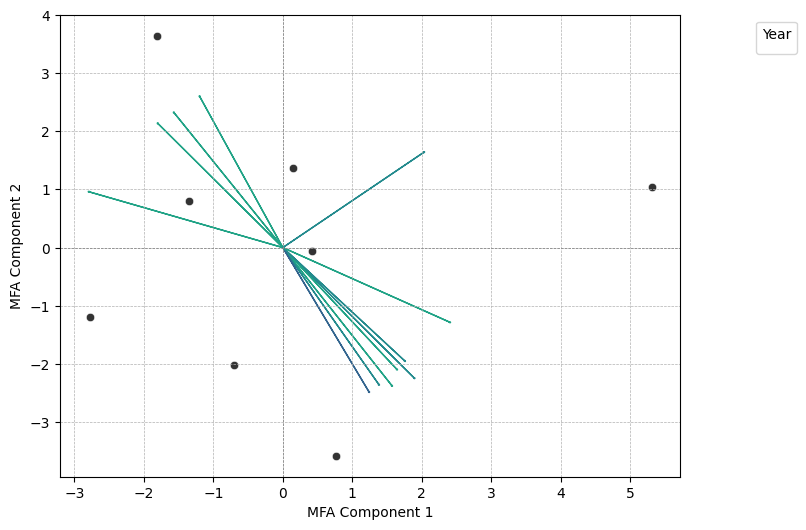

In [ ]:
# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], alpha=0.8, color='black')

# Define a scaling factor to extend the arrows
scaling_factor = 3  # Adjust this value to control arrow length

# Create a color map based on the group and intensity (Total Contribution)
norm = plt.Normalize(vmin=top_loadings['Loadings Contribution'].min(), vmax=top_loadings['Loadings Contribution'].max())  # Normalize based on Loadings Contribution
sm = plt.cm.ScalarMappable(cmap='Greys', norm=norm)
sm.set_array([])


# Plot the top loadings as arrows with colors based on the group and intensity by Total Contribution
for i, row in top_loadings.iterrows():
    # Color based on group
    group_color = group_colors.get(row['group'], 'black')  # Default to black if group is not found
    # Scale the arrow by Loadings Contribution
    intensity = norm(row['Loadings Contribution'])
    
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color=group_color, length_includes_head=True)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("")


# Show grid and legend
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1.2, 1))

plt.show()


# Dabble

In [ ]:
# make the clustermap df
clustermap_df = df_merged_all.drop(columns=['year', 'plot']) 
clustermap_df.set_index('Sample Name', inplace=True)

clustermap_df.columns = pd.MultiIndex.from_tuples(multi_index_columns)
clustermap_df = clustermap_df.astype("float64")

# Remove low-variance columns
#clustermap_df_var = clustermap_df.loc[:, clustermap_df.std() > 1e-10] 
clustermap_df_var = clustermap_df.loc[:, clustermap_df.std() > 1e-1] 

# Extract the group names (first level of multi-index)
groups = clustermap_df.columns.levels[0].tolist()

# Extract first level of MultiIndex (group names)
column_groups = clustermap_df_var.columns.get_level_values(0)
# Map group names to their assigned colors
col_colors = column_groups.map(group_colors)

print('Clusermap before: '+ str(clustermap_df.shape))
print('Clusermap remove low variane: '+ str(clustermap_df_var.shape))

Clusermap before: (22, 712)
Clusermap remove low variane: (22, 526)


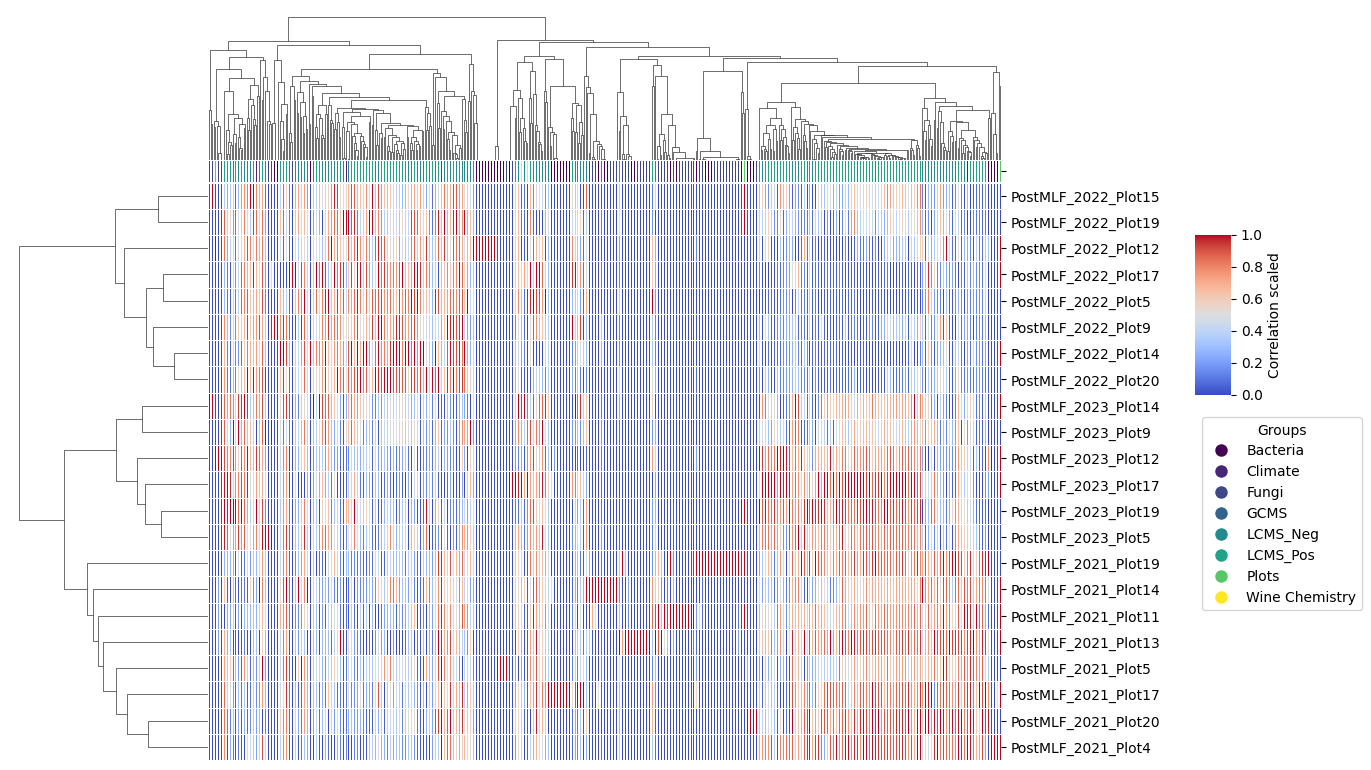

In [ ]:
# Ensure col_colors is a Series with the same column names as your clustermap_df_var
col_colors = pd.Series(col_colors, index=clustermap_df_var.columns)

# Plot with sns.clustermap
g = sns.clustermap(clustermap_df_var, metric="correlation", row_cluster=True, col_cluster=True, 
                   col_colors=col_colors, cmap="coolwarm", linewidths=0.5, figsize=(12, 8),standard_scale=1,
                   xticklabels=False,  # Remove column labels
                   cbar_pos=(1, .5, .03, .2))  # Adjust the colorbar position if needed

# Set labels and title using the clustermap object
g.ax_heatmap.set_xlabel("")
g.ax_heatmap.set_ylabel("")
g.ax_heatmap.set_title("")

# Optionally, adjust color bar or any other settings via the returned axes
g.cax.set_ylabel("Correlation scaled")  # If you'd like to remove colorbar label

# Adjust the column label size
for label in g.ax_col_dendrogram.get_xticklabels():
    label.set_fontsize(10)  # Set column label font size smaller
for label in g.ax_row_dendrogram.get_yticklabels():
    label.set_fontsize(10)  # Set row label font size smaller

# Create legends for col_colors with group names instead of hex codes
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
           for color in group_colors.values()]  # Use the colors from group_colors
labels = list(group_colors.keys())  # Use the group names for the legend labels


# Place the legends outside the plot and stack them vertically
plt.legend(handles=handles, labels=labels, title="Groups", bbox_to_anchor=(0, -0.1), loc='upper left', ncol=1)

# Show the plot
plt.show()